In [1]:
#Importing bunch of libraries.
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Input
from keras.models import Model
from keras.datasets import mnist



Using TensorFlow backend.


In [2]:
#Loading mnist dataset.
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#Scaling the pixels values to lie between 0 and 1.
x_train=x_train/255
x_test=x_test/255

#Reshaping the images as per the requirements by the Autoencoder.
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)


In [3]:
#Adding Random noise so that model is able to learn to differentiate between noise and useful features.
x_train_noise=x_train+0.4*np.random.normal(size=x_train.shape)
x_test_noise=x_test+0.4*np.random.normal(size=x_test.shape)


In [4]:
inp=Input((784,))
hid_enc=Dense(128,activation='relu')(inp)
code=Dense(32,activation='relu')(hid_enc)

hid_dec=Dense(128,activation='relu')(code)
out=Dense(784,activation='sigmoid')(hid_dec)

autoencoder=Model(inp,out)
autoencoder.compile(loss='binary_crossentropy',optimizer='Adam')
autoencoder.fit(x_train_noise,x_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.1530
Epoch 2/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.1192
Epoch 3/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.1140
Epoch 4/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1112
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1094
Epoch 6/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.1080
Epoch 7/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.1070
Epoch 8/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1062
Epoch 9/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.1054
Epoch 10/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1049


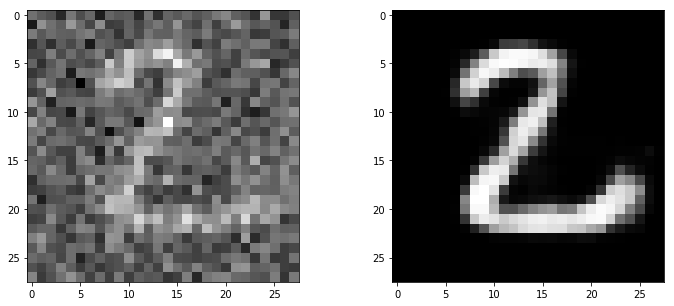

In [7]:
#Lets visualize the noisy input image and its prediction.
fig,axs=plt.subplots(1,2,figsize=(12,5))
axs[0].imshow(x_test_noise[1].reshape(28,28),cmap='gray')
pred=autoencoder.predict(np.expand_dims(x_test_noise[1],axis=0))
pred=pred.reshape(28,28)
axs[1].imshow(pred,cmap='gray')
plt.show()

